# RNN and RL predict stock prices

This project is conducted under the scope of IA321 course at ENSTA Paris.

## Install yfinance

In [7]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 19.8 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Import Libraries

In [38]:
%matplotlib inline

import pandas as pd
import numpy as np
import yfinance as yf

from matplotlib import pyplot as plt

## Data Extraction and Visualization

In [31]:
# download S&P data from yahoo finance
START_DATE = '1950-01-03'
END_DATE = '2021-11-16'
INTERVAL = '1d'
df = yf.download('^GSPC', start=START_DATE, end=END_DATE, interval=INTERVAL)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...
2021-11-09,4707.250000,4708.529785,4670.870117,4685.250000,4685.250000,3110230000
2021-11-10,4670.259766,4684.850098,4630.859863,4646.709961,4646.709961,3581630000
2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,4649.270020,2623140000


In [32]:
# only keep the closing price of each day
data = df['Close']
data.head()

Date
1950-01-03    16.66
1950-01-04    16.85
1950-01-05    16.93
1950-01-06    16.98
1950-01-09    17.08
Name: Close, dtype: float64

In [33]:
data.describe()

count    18086.000000
mean       682.858297
std        874.772330
min         16.660000
25%         87.242498
50%        207.809998
75%       1154.667542
max       4701.700195
Name: Close, dtype: float64

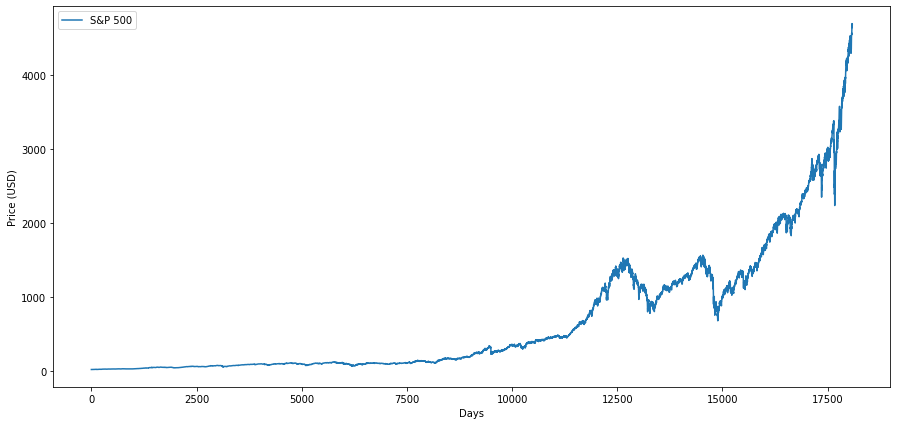

In [71]:
# plot all S&P 500 values
x = [i for i in range(len(data))]
y = [data[i] for i in range(len(data))]

plt.figure(figsize=(15,7))

plt.plot(x, y)
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend(['S&P 500'])

plt.show()

## RNN Configuration

In [49]:
# Configuration is wrapped in one object for easy tracking and passing.
class RNNConfig():
    input_size=1 # nb of examples per window
    num_steps=30 # nb of unfolded layers
    lstm_size=128
    num_layers=1
    keep_prob=0.8
    batch_size = 64
    init_learning_rate = 0.001
    learning_rate_decay = 0.99
    init_epoch = 5 # nb of epochs where learning rate stays init_learning_rate
    max_epoch = 50

config = RNNConfig()

## Preprocessing Data

In [64]:
# Normalization : we now study the change in the index not its value
norm_data = []
for i in range(len(data)-1):
  norm_data.append(data[i+1]/data[i])

print("Size of normalized data : ", len(norm_data))

Size of normalized data :  18085


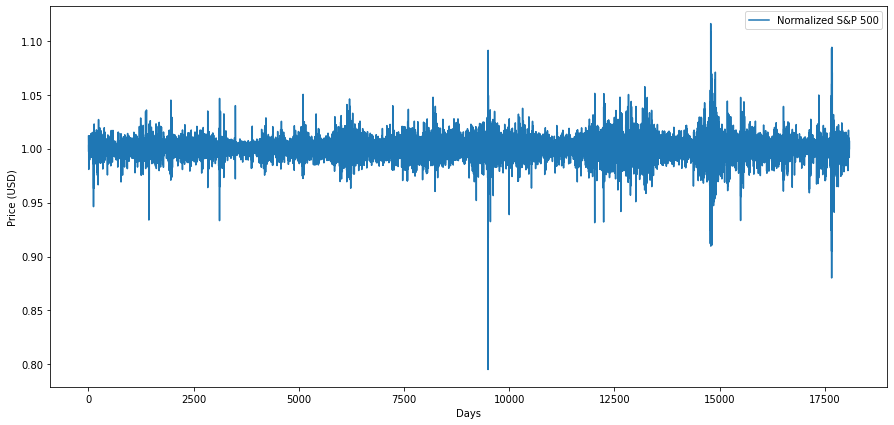

In [72]:
# plot all normalized S&P 500 values
x = [i for i in range(len(norm_data))]
y = [norm_data[i] for i in range(len(norm_data))]

plt.figure(figsize=(15,7))

plt.plot(x, y)
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend(['Normalized S&P 500'])

plt.show()

In [73]:
# Split X and y (train/label)
seq = [np.array(data[i * config.input_size: (i + 1) * config.input_size]) 
       for i in range(len(data) // config.input_size)]

# Split into groups of `num_steps`
X = np.array([seq[i: i + config.num_steps] for i in range(len(seq) - config.num_steps)])
y = np.array([seq[i + config.num_steps] for i in range(len(seq) - config.num_steps)])

In [74]:
print("Shape of X : ", X.shape) # (nb_examples, num_steps, input_size)
print("Shape of y : ", y.shape) # (nb_examples, input_size)

Shape of X :  (18056, 30, 1)
Shape of y :  (18056, 1)
